In [1]:
# Esse código Python foi escrito por Douglas Grillo.
# Ele traz um modelo preditivo de propagação da Covid-19 por meio de lógica difusa.
# Deixo aqui os créditos à Alison Zille Lopes, que foi autor de um código que utilizei como referência de estudo para o desenvolvimento deste.
# A opção pela utilização da biblioteca Scikit-fuzzy foi devido a sua boa documentação de apoio, o que a faz uma das mais populares para Python.
#
# Verifica a versão do Python (Opcional)
!python --version

Python 3.9.16


In [ ]:
# Bloco1
# Instação do pacote skfuzzy e matplotlib
!pip install scikit-fuzzy
!pip install matplotlib

In [ ]:
# Bloco 2
# Fuzzificação
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando as variáveis do problema
NovosCasos = ctrl.Antecedent(np.arange(0, 606, 1), 'NovosCasos') #
CVac = ctrl.Antecedent(np.arange(0, 100, 0.1), 'CVac')
variacao = ctrl.Consequent(np.arange(-2.0, 2, 0.01), 'variacao')

# Criando as funções de pertinência para a NovosCasos
NovosCasos['B'] = fuzz.trapmf(NovosCasos.universe, [0, 0, 14, 25])                #Baixa
NovosCasos['MB'] = fuzz.trimf(NovosCasos.universe, [20, 45, 67])                  #Média Baixa
NovosCasos['M'] = fuzz.trimf(NovosCasos.universe, [62, 87, 108])                  #Média
NovosCasos['MA'] = fuzz.trimf(NovosCasos.universe, [103, 129, 150])                #Média Alta
NovosCasos['A'] = fuzz.trimf(NovosCasos.universe, [145, 324, 499])                #Alta
NovosCasos['AL'] = fuzz.trapmf(NovosCasos.universe, [494, 501, 606, 606])         #Altíssima 

# Criando as funções de pertinência para a CVac
CVac['NV'] = fuzz.trapmf(CVac.universe, [0, 0, 1.0, 1.0])                       #Sem vacinação
CVac['BCV'] = fuzz.trapmf(CVac.universe, [1.0, 7, 23, 33])                       #Baixa Cobertura Vacinal
CVac['MCV'] = fuzz.trapmf(CVac.universe, [23, 33, 47, 58])                        #Média Cobertura Vacinal
CVac['ACV'] = fuzz.trapmf(CVac.universe, [47, 58, 72, 78.5])                      #Alta cobertura Vacinal
CVac['QCV'] = fuzz.trapmf(CVac.universe, [72, 78.5, 92.5, 100])                  #Queda Cobertura Vacinal

# Criando as funções de pertinência para TEC
variacao['AN'] = fuzz.trapmf(variacao.universe, [-2.0, -2.0, -1.6, -1.2])           #Alta Negativa
variacao['MN'] = fuzz.trimf(variacao.universe, [-1.6, -1.0, -0.4])                  #Média negativa
variacao['BN'] = fuzz.trapmf(variacao.universe, [-0.8, -0.4, -0.0001, 0.0])         #Baixa Negativa
variacao['BP'] = fuzz.trapmf(variacao.universe, [0.0, 0.0001, 0.4, 0.8])            #Baixa positiva
variacao['MP'] = fuzz.trimf(variacao.universe, [0.4, 1.0, 1.6])                     #Média positiva
variacao['AP'] = fuzz.trapmf(variacao.universe, [1.2, 1.6, 2.0, 2.0])               #Alta positiva



In [ ]:
# Bloco 3
# Plotando gráfico das funções de pertinência para cada variável
NovosCasos.view()
CVac.view()
variacao.view()

In [ ]:
# Bloco 4
# Inferência Fuzzy

# Base de Conhecimento/Regras
rule1 = ctrl.Rule(NovosCasos['B'] & CVac['NV'], variacao['MP'])
rule2 = ctrl.Rule(NovosCasos['B'] & CVac['BCV'], variacao['BP'])
rule3 = ctrl.Rule(NovosCasos['B'] & CVac['MCV'], variacao['BN'])
rule4 = ctrl.Rule(NovosCasos['B'] & CVac['ACV'], variacao['MN'])
rule5 = ctrl.Rule(NovosCasos['B'] & CVac['QCV'], variacao['BN'])

rule6 = ctrl.Rule(NovosCasos['MB'] & CVac['NV'], variacao['AP'])
rule7 = ctrl.Rule(NovosCasos['MB'] & CVac['BCV'], variacao['MP'])
rule8 = ctrl.Rule(NovosCasos['MB'] & CVac['MCV'], variacao['BN'])
rule9 = ctrl.Rule(NovosCasos['MB'] & CVac['ACV'], variacao['MN'])
rule10 = ctrl.Rule(NovosCasos['MB'] & CVac['QCV'], variacao['BN'])

rule11 = ctrl.Rule(NovosCasos['M'] & CVac['NV'], variacao['AP'])
rule12 = ctrl.Rule(NovosCasos['M'] & CVac['BCV'], variacao['AP'])
rule13 = ctrl.Rule(NovosCasos['M'] & CVac['MCV'], variacao['MN'])
rule14 = ctrl.Rule(NovosCasos['M'] & CVac['ACV'], variacao['MN'])
rule15 = ctrl.Rule(NovosCasos['M'] & CVac['QCV'], variacao['MN'])

rule16 = ctrl.Rule(NovosCasos['MA'] & CVac['NV'], variacao['MP'])
rule17 = ctrl.Rule(NovosCasos['MA'] & CVac['BCV'], variacao['AP'])
rule18 = ctrl.Rule(NovosCasos['MA'] & CVac['MCV'], variacao['MN'])
rule19 = ctrl.Rule(NovosCasos['MA'] & CVac['ACV'], variacao['AN'])
rule20 = ctrl.Rule(NovosCasos['MA'] & CVac['QCV'], variacao['MN'])

rule21 = ctrl.Rule(NovosCasos['A'] & CVac['NV'], variacao['BP'])
rule22 = ctrl.Rule(NovosCasos['A'] & CVac['BCV'], variacao['BP'])
rule23 = ctrl.Rule(NovosCasos['A'] & CVac['MCV'], variacao['AN'])
rule24 = ctrl.Rule(NovosCasos['A'] & CVac['ACV'], variacao['AN'])
rule25 = ctrl.Rule(NovosCasos['A'] & CVac['QCV'], variacao['AN'])

rule26 = ctrl.Rule(NovosCasos['AL'] & CVac['NV'], variacao['BP'])
rule27 = ctrl.Rule(NovosCasos['AL'] & CVac['BCV'], variacao['BN'])
rule28 = ctrl.Rule(NovosCasos['AL'] & CVac['MCV'], variacao['AN'])
rule29 = ctrl.Rule(NovosCasos['AL'] & CVac['ACV'], variacao['AN'])
rule30 = ctrl.Rule(NovosCasos['AL'] & CVac['QCV'], variacao['AN'])



# Sistema Fuzzy e Simulação
variacao_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30])
variacao_simulador = ctrl.ControlSystemSimulation(variacao_ctrl)



In [ ]:
# Bloco 5
# Cálculo em massa
# abrir a planilha
import openpyxl
workbook = openpyxl.load_workbook('dadosCov.xlsx')
worksheet = workbook.active

# percorrer todas as linhas da planilha, começando da segunda linha (linha 2)
for row in range(2, worksheet.max_row + 1):
    # ler os valores das colunas A e B do registro atual
    valor_b = float(worksheet.cell(row=row, column=2).value)
    valor_c = float(worksheet.cell(row=row, column=3).value)

    # passar os valores como entradas para o sistema especialista
    
    variacao_simulador.input['NovosCasos'] = valor_b
    variacao_simulador.input['CVac'] = valor_c
    # chamar o método de inferência do sistema especialista para calcular o resultado
    variacao_simulador.compute()
    result = variacao_simulador.output['variacao']

    # escrever o resultado na coluna C do registro atual
    worksheet.cell(row=row, column=4).value = result
   

# salvar a planilha atualizada
workbook.save('Saidasfuzzy.xlsx')


In [ ]:
# Bloco 6
# Visualizando as regiões da última iteração
NovosCasos.view(sim=variacao_simulador)
CVac.view(sim=variacao_simulador)
variacao.view(sim=variacao_simulador)

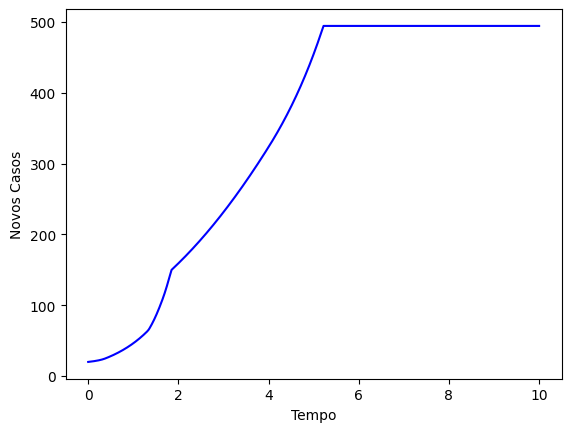

In [ ]:
# Bloco 7
# Definindo o método de Euler
import matplotlib.pylab as plt
def it_euler(t, x, h, n_steps):      # t=tempo inicial, x=valor inicial de novos casos, h= tamanho do passo, n_steps=quantidade de iterações
    X = [x]
    T = [t]
    #Criando o loop  
    for k in range(n_steps + 1):
        variacao_simulador.input['NovosCasos'] = x
        variacao_simulador.input['CVac'] = 10
        variacao_simulador.compute()  
        var = variacao_simulador.output['variacao']
        x += x * h * var
        t += h
        X.append(x)
        T.append(t)
    
    #Armazenando os resultados
    x_array = np.array(X)
    t_array = np.array(T)

    # Informações do plot
    fig = plt.figure()
    ax = fig.add_subplot(111, facecolor='w', axisbelow=True)
    ax.plot(T, X, 'b', label = 'População') 
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Novos Casos')
    plt.savefig('euler.png')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()  

    # Salvar valores em arquivo CSV
    np.savetxt("valores.csv", np.column_stack((t_array, x_array)), delimiter=",")
    # Método de Euler
it_euler(0, 20, 0.001, 10000)   #Definir os valores de: Tempo inicial(t), população inicial(x), Tamanho do passo(h), iterações(n_steps) 
